# HOUGH TRANSFORM AND HARRIS CORNER DETECTION

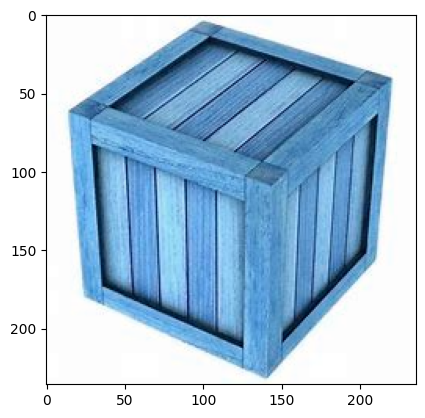

In [17]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\student\Desktop\sportsshop\exp4\oo.jpg")
plt.imshow(image)
plt.show()

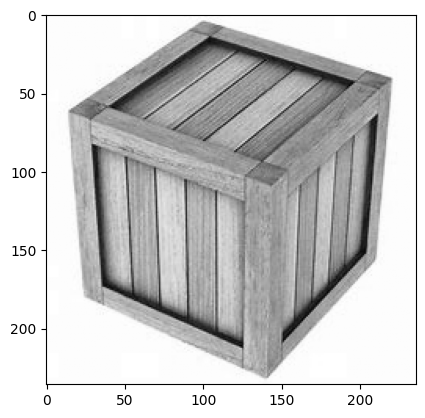

In [18]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

# HARRIS CORNER

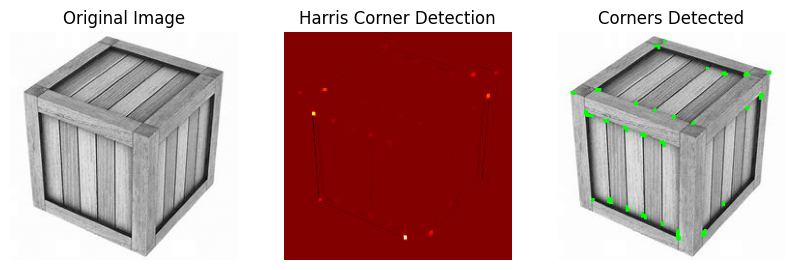

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\student\Desktop\sportsshop\exp4\oo.jpg", cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
dst = cv2.cornerHarris(blurred_image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
image_color[dst > 0.01 * dst.max()] = [0, 255, 0]  
plt.figure(figsize=(10, 7))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dst, cmap='hot')  
plt.title('Harris Corner Detection')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))  
plt.title('Corners Detected')
plt.axis('off')

plt.show()


# HOUGH TRANSFORM

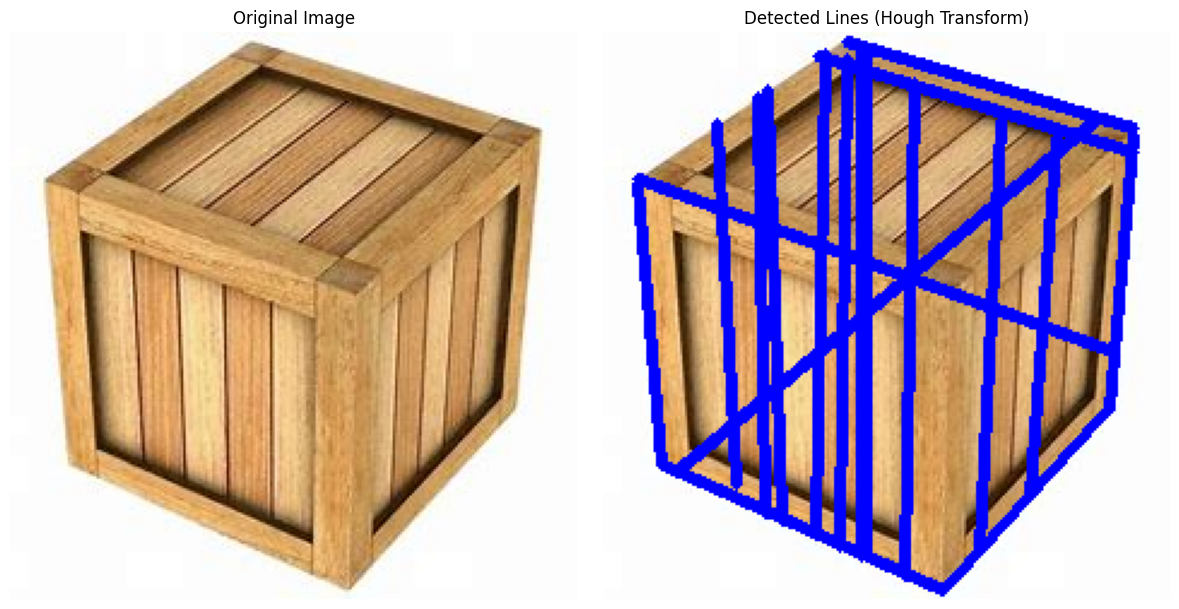

In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\student\Desktop\sportsshop\exp4\oo.jpg", cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using Canny edge detector
edges = cv2.Canny(gray, 50, 200)

# Detect points that form a line using Hough Line Transform (probabilistic version)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 80, minLineLength=15, maxLineGap=250)

# Draw lines on the image (original image with lines)
img_with_lines = img.copy()  # Create a copy of the original image to draw lines on
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Draw red lines

# Display the original and result image using subplots
plt.figure(figsize=(12, 6))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for matplotlib
plt.title('Original Image')
plt.axis('off')

# Show the image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for matplotlib
plt.title('Detected Lines (Hough Transform)')
plt.axis('off')

# Show the images
plt.tight_layout()
plt.show()
